In [ ]:
#clustering_improved

In [1]:
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.cluster import KMeans
#from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import names
from sklearn.datasets import fetch_20newsgroups
import numpy as np
from matplotlib import pyplot as plt
from nltk.corpus import stopwords

In [2]:
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

In [3]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    all_names = set(names.words())

    # Remove stopwords and short words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in all_names]

    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [4]:
groups = fetch_20newsgroups(subset='all', categories=categories)

labels = groups.target
label_names = groups.target_names

In [5]:
data_cleaned = [clean_text(doc) for doc in groups.data]

tfidf_vector = TfidfVectorizer(stop_words='english', max_features=5000, max_df=0.3, min_df=2)

data = tfidf_vector.fit_transform(data_cleaned)

In [6]:
k_list = list(range(1, 7))
sse_list = [0] * len(k_list)

for k_ind, k in enumerate(k_list):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_

    sse = 0
    for i in range(k):
        cluster_i = np.where(clusters == i)

        sse += np.linalg.norm(data[cluster_i] - centroids[i])

    print('k={}, SSE={}'.format(k, sse))
    sse_list[k_ind] = sse

k=1, SSE=57.62452819191313
k=2, SSE=80.44825743274554
k=3, SSE=87.29665510105053
k=4, SSE=107.80713729096169
k=5, SSE=114.67992907849614
k=6, SSE=123.51095043170278


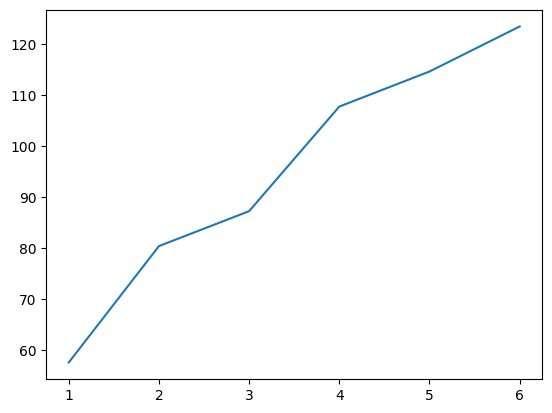

In [7]:
plt.plot(k_list, sse_list)
plt.show()

In [8]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=k)
agg_clusters = agg_clustering.fit_predict(data.toarray())

print(Counter(agg_clusters))

cluster_label = {i: labels[np.where(agg_clusters == i)] for i in range(k)}
terms = tfidf_vector.get_feature_names_out()
for cluster, index_list in cluster_label.items():
    counter = Counter(cluster_label[cluster])
    print('cluster_{}: {} samples'.format(cluster, len(index_list)))
    for label_index, count in sorted(counter.items(), key=lambda x: x[1], reverse=True):
        print('{}: {} samples'.format(label_names[label_index], count))
    print('Top 10 terms:')
    centroid_indices = np.where(agg_clusters == cluster)
    centroid_values = data[centroid_indices].mean(axis=0).ravel()
    top_terms_indices = centroid_values.argsort()[-10:]
    for ind in top_terms_indices:
        print(' %s' % terms[ind], end="")
    print()

Counter({0: 1404, 3: 1073, 1: 642, 2: 119, 5: 77, 4: 72})
cluster_0: 1404 samples
alt.atheism: 647 samples
talk.religion.misc: 523 samples
sci.space: 150 samples
comp.graphics: 84 samples
Top 10 terms:
 [['shading' 'palmer' 'baube' ... 'say' 'people' 'god']]
cluster_1: 642 samples
sci.space: 610 samples
comp.graphics: 15 samples
alt.atheism: 9 samples
talk.religion.misc: 8 samples
Top 10 terms:
 [['aaron' 'juhana' 'judgment' ... 'access' 'nasa' 'space']]
cluster_2: 119 samples
alt.atheism: 112 samples
talk.religion.misc: 7 samples
Top 10 terms:
 [['aaron' 'nick' 'nickh' ... 'livesey' 'sgi' 'keith']]
cluster_3: 1073 samples
comp.graphics: 874 samples
sci.space: 150 samples
talk.religion.misc: 35 samples
alt.atheism: 14 samples
Top 10 terms:
 [['zoroastrian' 'nucleus' 'nu' ... 'image' 'file' 'graphic']]
cluster_4: 72 samples
talk.religion.misc: 55 samples
alt.atheism: 17 samples
Top 10 terms:
 [['aaron' 'nyx' 'oak' ... 'apple' 'kent' 'sandvik']]
cluster_5: 77 samples
sci.space: 77 sample